In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
from collections import defaultdict
import matplotlib.ticker as ticker
import re

In [ ]:
# Base directory
base_path = "/home/tvanhout/oxides_ML/models/Experiments/RELAXED/"
experiments = [
    "Experiment0/0A", "Experiment0/0B", "Experiment0/0C",
    "Experiment1/1A", "Experiment1/1B", "Experiment1/1C",
    "Experiment2/2A",
    "Experiment3/3A", "Experiment3/3B", "Experiment3/3C"
]
runs = ["run1", "run2", "run3", "run4", "run5"]

plt_path = "figures/"

plt.rcParams.update({
    "font.family": "Arial",
    "axes.labelsize": 14,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.titlesize": 13,
})


In [6]:
# Collect MAE data
summary_data = []

for experiment in experiments:
    maes = []
    for run in runs:
        csv_path = os.path.join(base_path, experiment, run, "test_set.csv")
        df = pd.read_csv(csv_path)
        mae = round(df["Abs_error_eV"].mean(), 2)
        maes.append(mae)
    short = experiment.split("/")[-1]
    summary_data.append({
        "Experiment": experiment,
        "Group": experiment.split("/")[0],  # e.g., Experiment0
        "ShortLabel": short,
        "MAEs": maes,
        "MAE_Mean": round(np.mean(maes), 2),
        "MAE_Std": round(np.std(maes), 2)
    })

# Create summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Assign consistent color to each ShortLabel
unique_labels = sorted(summary_df["ShortLabel"].unique())
color_map = cm.get_cmap('tab10', len(unique_labels))
label_colors = {label: color_map(i) for i, label in enumerate(unique_labels)}

# Ensure the output path exists
os.makedirs(plt_path, exist_ok=True)

# Save summary DataFrame to CSV
summary_csv_path = os.path.join(plt_path, "experiment_mae_summary.csv")
summary_df.to_csv(summary_csv_path, index=False)

display(summary_df)

/tmp/ipykernel_1506143/4036598346.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab10', len(unique_labels))


,Experiment,Group,ShortLabel,MAEs,MAE_Mean,MAE_Std
0,Experiment1/1A_2,Experiment1,1A_2,[0.85],0.85,0.0
1,Experiment1/1C_2,Experiment1,1C_2,[5.12],5.12,0.0


/tmp/ipykernel_1506143/966433346.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(summary_df))


NameError: name 'arial_font' is not defined

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

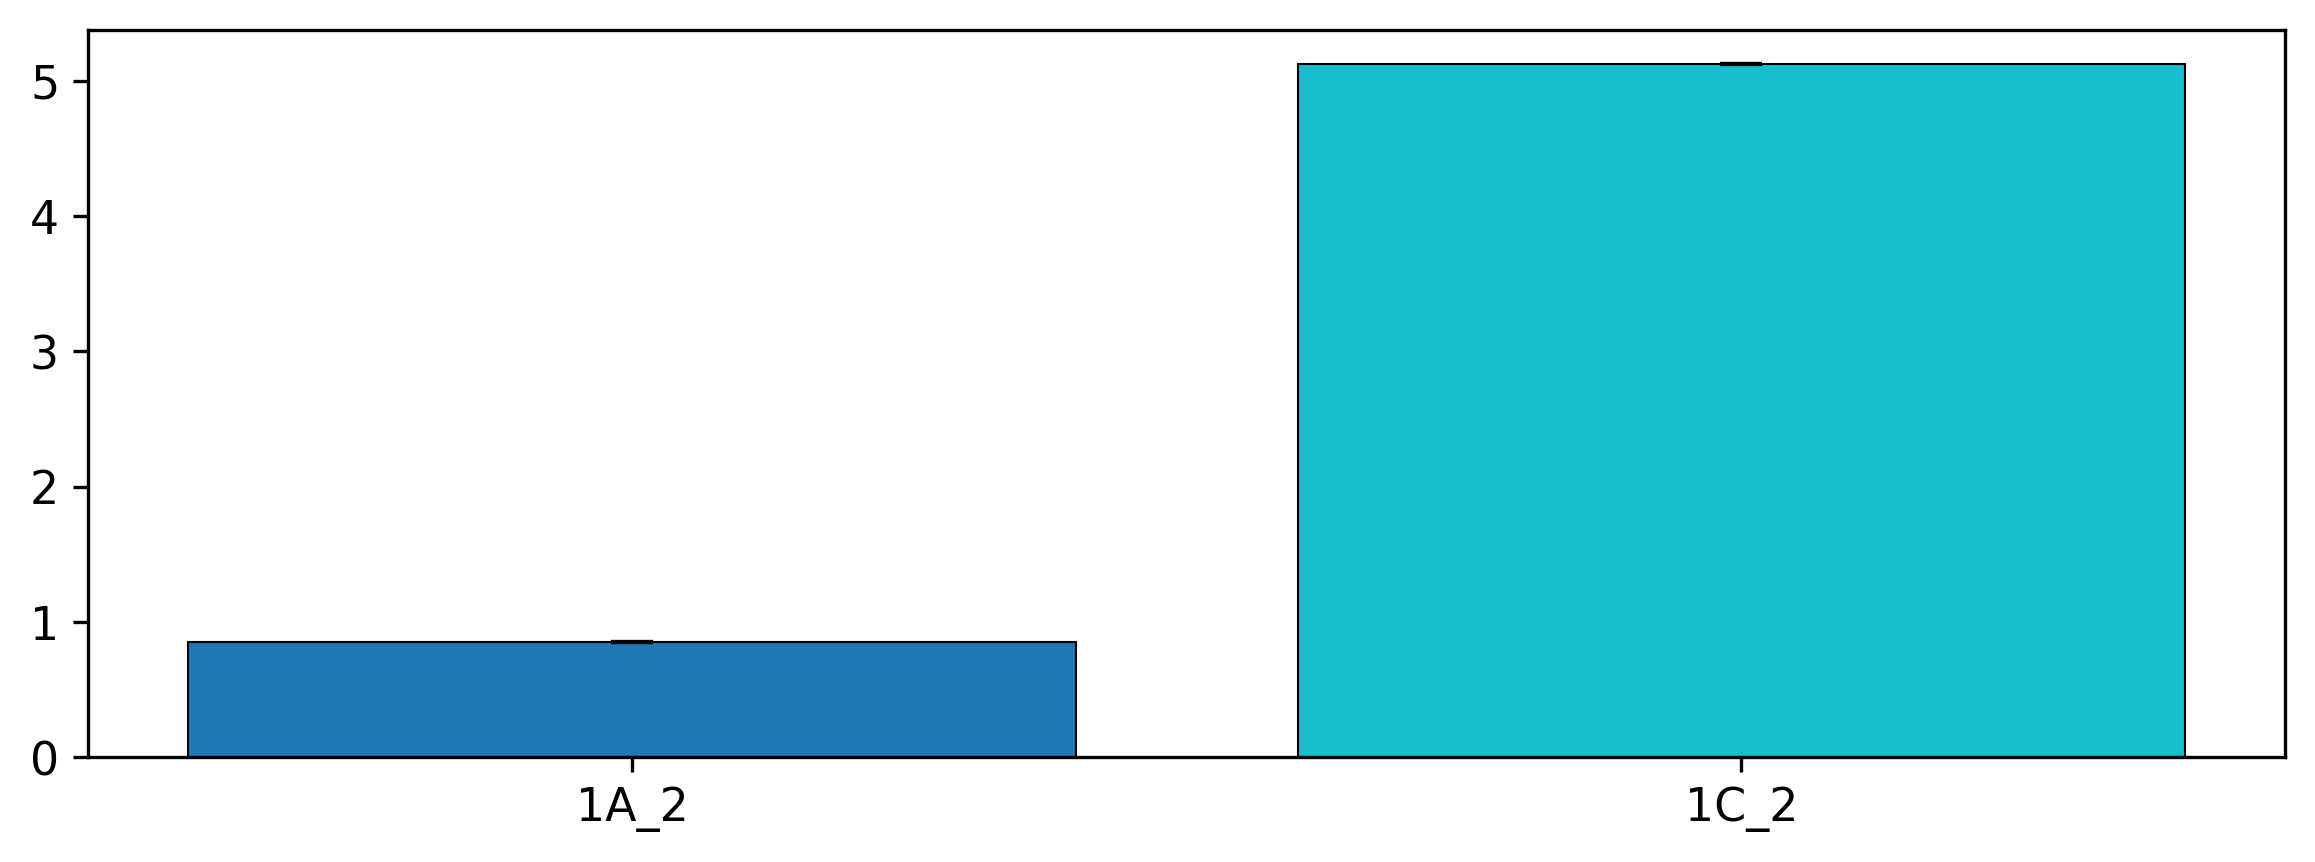

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(24/2.54, 8/2.54), dpi=300)

colors = cm.get_cmap('tab10', len(summary_df))
bars = ax.bar(
    summary_df["ShortLabel"],
    summary_df["MAE_Mean"],
    yerr=summary_df["MAE_Std"],
    capsize=5,
    color=[colors(i) for i in range(len(summary_df))],
    linewidth=0.5,
    edgecolor='black'
)

# Axis labels with correct font and format
ax.set_ylabel(r"$\it{\mathrm{MAE}}$ / eV", fontproperties=arial_font)
ax.set_xlabel("Experiment", fontproperties=arial_font)
# ax.set_title("Average MAE Across 5 Runs for Each Experiment", fontproperties=arial_font)

# Apply font to ticks
ax.set_xticklabels(summary_df["ShortLabel"], fontproperties=arial_font, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticks(), fontproperties=arial_font)

plt.tight_layout()
fig.savefig(os.path.join(plt_path, "all_experiments.svg"), dpi=300, bbox_inches="tight")
fig.savefig(os.path.join(plt_path, "all_experiments.png"), dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Group by experiment group (e.g., Experiment0)
grouped = summary_df.groupby("Group")

for group_name, group_df in grouped:
    fig, ax = plt.subplots(figsize=(24/2.54, 8/2.54), dpi=300)

    pretty_group_name = re.sub(r"([A-Za-z]+)(\d+)", r"\1 \2", group_name)

    bars = ax.bar(
        group_df["ShortLabel"],
        group_df["MAE_Mean"],
        yerr=group_df["MAE_Std"],
        capsize=5,
        color=[label_colors[label] for label in group_df["ShortLabel"]],
        linewidth=0.5,
        edgecolor='black'
    )

    ax.set_ylabel(r"$\it{MAE}$ / eV", fontproperties=arial_font.copy().set_size(14))
    ax.set_xlabel("Experiment", fontproperties=arial_font.copy().set_size(14))
    ax.set_title(f"Average MAE Across 5 Runs – {pretty_group_name}", fontproperties=arial_font.copy().set_size(13))

    ax.set_xticklabels(group_df["ShortLabel"], fontproperties=arial_font.copy().set_size(11), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticks(), fontproperties=arial_font.copy().set_size(11))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

    plt.tight_layout()

    fig.savefig(os.path.join(plt_path, f"{group_name}.svg"), dpi=300, bbox_inches="tight")
    fig.savefig(os.path.join(plt_path, f"{group_name}.png"), dpi=300, bbox_inches="tight")

    plt.show()
